# 資料探勘

### 載入所需資料

In [1]:
import numpy as np
import pandas as pd
import csv
import random
import math
import operator
import random
%matplotlib inline

In [2]:
import matplotlib
matplotlib.matplotlib_fname()

'/root/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='DejaVu Serif' #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [4]:
[f.name for f in matplotlib.font_manager.fontManager.ttflist]

['STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'cmss10',
 'cmb10',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmmi10',
 'STIXNonUnicode',
 'cmr10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXSizeFiveSym',
 'cmex10',
 'DejaVu Serif',
 'cmsy10',
 'STIXGeneral',
 'cmtt10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Sans']

In [5]:
# 將train.csv載入
data = pd.read_csv('./Data/train.csv',)
data = data.rename(columns = {'花萼長度':'SepalLengthCm','花萼寬度':'SepalWidthCm',
                             '花瓣長度':'PetalLengthCm','花瓣寬度':'PetalWidthCm'})
data.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [6]:
# 查看train 的資料形狀
data.shape

(123, 7)

In [7]:
# 查看每一筆特徵值共有多少個不一樣的數值
data["type"].value_counts()

3    40
2    40
1    40
4     3
Name: type, dtype: int64

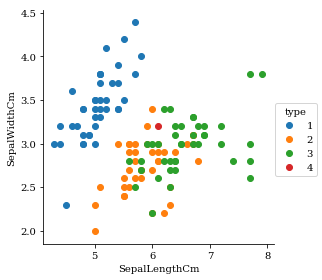

In [8]:
# 觀看 SepalLengthCm & SepalWidthCm 分布狀況
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(data, hue="type", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
plt.show();

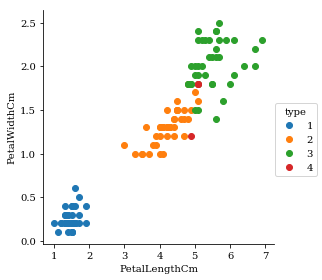

In [9]:
# 觀看 PetalLengthCm & PetalWidthCm 分布狀況
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(data, hue="type", size=4).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend();
plt.show();

/root/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/root/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


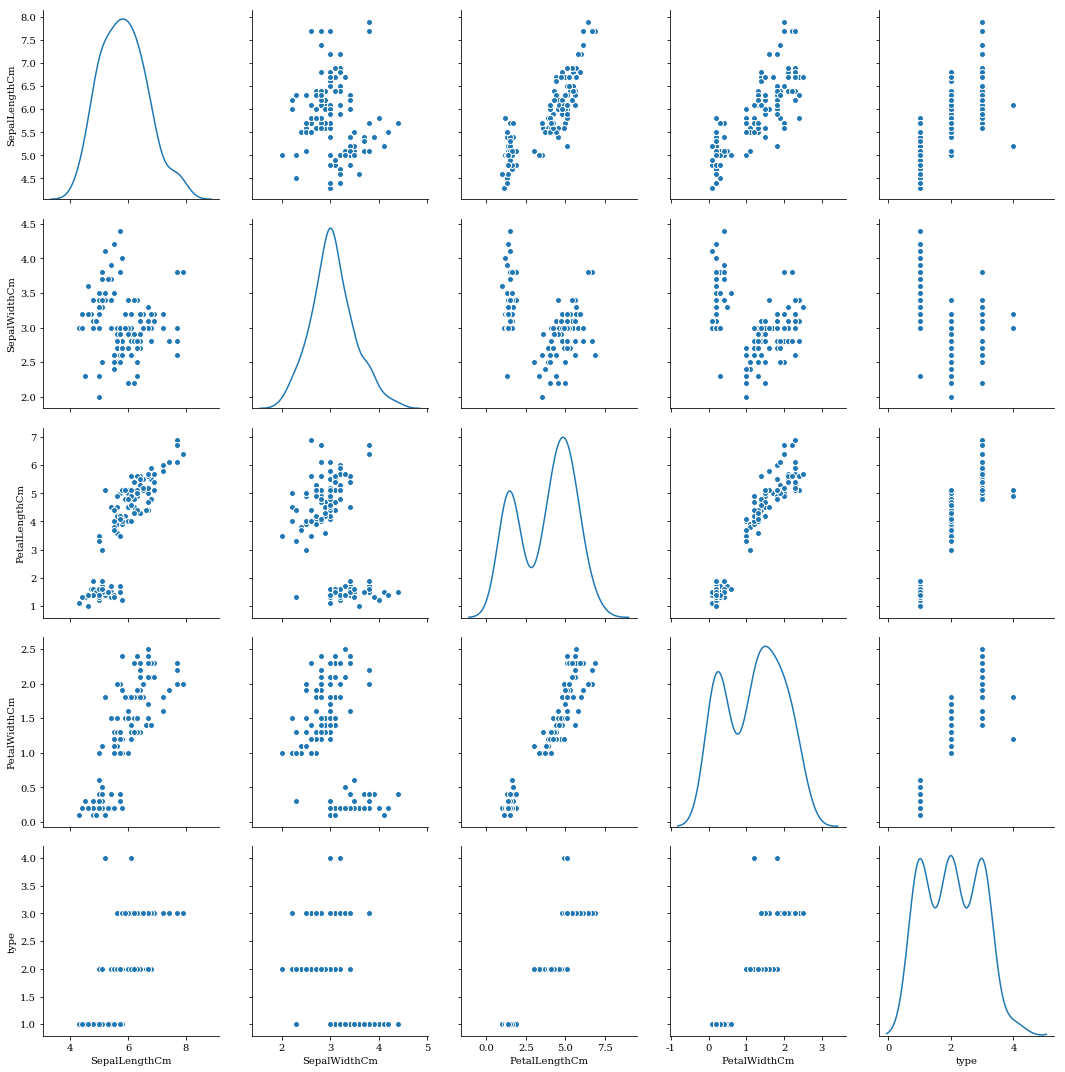

In [10]:
data_pairplot = data.drop(['屬種','id'],axis=1)
sns.pairplot(data_pairplot,  size=3, diag_kind="kde");
plt.show()

In [11]:
"""""""""
 從上面的配對圖中，我們看到Iris-setosa在所有方面都是可區分的。 
 至於區分Iris-versicolor和Irish-verginica和Iris-new_type，它們可以根據以下分離：花瓣長度 & 花瓣寬度
"""""""""

'\n 從上面的圖可以看出來，Iris-setosa是可以被區分出來的，其他的數種可以根據 花萼長度 及 花萼長度 去做更細部的分類\n'

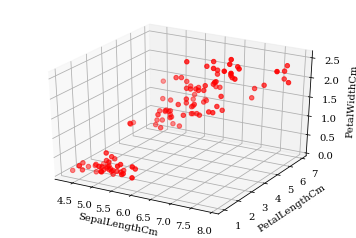

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

x=data["SepalLengthCm"]
y=data["PetalLengthCm"]
z=data["PetalWidthCm"]

#color=("Iris-setosa", "Iris-virginica", "Iris-versicolor")
#color=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
ax.scatter(x,y,z,c='r',marker='o');

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

plt.show()

In [ ]:
"""""""""""
從上面散佈的情節，我們可以清楚地區分Iris-setosa，但是基於它們的萼片寬度和萼片長度無法區分Iris-versicolor和Iris-verginica
"""""""""""

In [13]:
data.describe()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,type
count,123.000000,122.000000,122.000000,123.000000,123.000000,123.000000
mean,62.000000,5.840164,3.058197,3.764228,1.204878,2.048780
std,35.651087,0.790926,0.445332,1.731536,0.754425,0.867006
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,31.500000,5.200000,2.800000,1.600000,0.300000,1.000000
50%,62.000000,5.800000,3.000000,4.300000,1.300000,2.000000
75%,92.500000,6.375000,3.300000,5.100000,1.800000,3.000000
max,123.000000,7.900000,4.400000,6.900000,2.500000,4.000000


In [14]:
"""""""""""
  數據集的一些參數和非參數統計:參數：平均值，標準偏差，最小值，最大值，計數;非參數：25％，50％，75％
"""""""""""

'""\n  數據集的一些參數和非參數統計:參數：平均值，標準偏差，最小值，最大值，計數;非參數：25％，50％，75％\n'

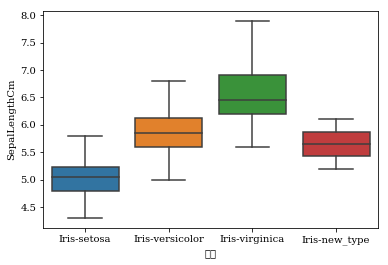

In [15]:
sns.boxplot(x='屬種',y='SepalLengthCm', data=data)
plt.show()

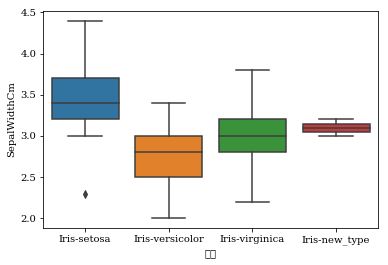

In [16]:
sns.boxplot(x='屬種',y='SepalWidthCm', data=data)
plt.show()

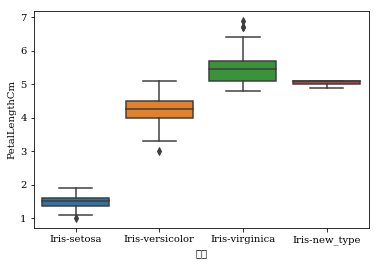

In [17]:
sns.boxplot(x='屬種',y='PetalLengthCm', data=data)
plt.show()

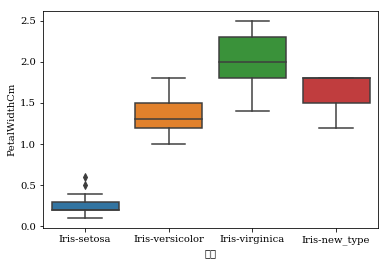

In [18]:
sns.boxplot(x='屬種',y='PetalWidthCm', data=data)
plt.show()

In [19]:
"""""""""""
從上面的boxplot中可以看出4種花可以根據花瓣長度和花瓣寬度來區分
"""""""""""

'""\n從上面的boxplot中可以看出4種花可以根據花瓣長度和花瓣寬度來區分\n'

In [20]:
data.corr()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,type
id,1.000000,0.694035,-0.391710,0.879807,0.887936,0.944051
SepalLengthCm,0.694035,1.000000,-0.132300,0.861842,0.813901,0.750904
SepalWidthCm,-0.391710,-0.132300,1.000000,-0.437289,-0.368907,-0.399240
PetalLengthCm,0.879807,0.861842,-0.437289,1.000000,0.958595,0.921715
PetalWidthCm,0.887936,0.813901,-0.368907,0.958595,1.000000,0.918191
type,0.944051,0.750904,-0.399240,0.921715,0.918191,1.000000


In [21]:
"""""""""""
可以看出高度相關係數的有: 花瓣長度，花瓣寬度
"""""""""""

'""\n可以看出高度相關係數的有: 花瓣長度，花瓣寬度\n'

# 資料清理

In [22]:
# 將不需要的特徵值利用drop去刪除
X = data.drop(['id','屬種','type'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.4,3.7,1.5,0.2
1,4.8,3.4,1.6,0.2
2,4.8,3.0,1.4,0.1
3,4.3,3.0,1.1,0.1
4,5.8,4.0,1.2,0.2


In [23]:
# 利用pandas裡的 isnull 加上 sum 
# 可以看出哪些特徵值有空值(缺值)
X.isnull().sum()

SepalLengthCm    1
SepalWidthCm     1
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [24]:
# 將target
y = data['type']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

In [25]:
#將有缺值的地方，利用各特徵值之平均數，藉由 fillna 方法填補空值
X['SepalLengthCm'] = X['SepalLengthCm'].fillna(X['SepalLengthCm'].mean())
X['SepalWidthCm'] = X['SepalWidthCm'].fillna(X['SepalWidthCm'].mean())

X.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

# 建立模型

In [26]:
# 利用 train_test_split 方法將資料切分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

In [27]:
# 採用xgbc建模方式進行預測
import xgboost as xgb

xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [28]:
# 測試xgbc的分數
xgbc.score(X_test, y_test)

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8918918918918919

# 資料上傳

In [29]:
# 將test資料載入
test_data = pd.read_csv('./Data/test.csv')
test_data = test_data.rename(columns = {'花萼長度':'SepalLengthCm','花萼寬度':'SepalWidthCm',
                             '花瓣長度':'PetalLengthCm','花瓣寬度':'PetalWidthCm'})
test_data.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [30]:
# 確認 test 資料沒有空(缺)值
test_data.isnull().sum()

id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [31]:
# 將 id 欄位刪除(非我們所需特徵值)
test_feature = test_data.drop('id',axis=1)

In [32]:
# 利用 xgbc.predict 進行 test 檔案預測，並將預測結果存至 predict
predict = xgbc.predict(test_feature)

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
# 創建儲存上傳csv檔之Dataframe
# 利用字典將test欄位"id"與'predict'(預測值) 儲存至Dataframe
data = {'id':test_data['id'],'type':predict}

predicted_dataframe = pd.DataFrame(data=data)

In [36]:
predicted_dataframe.head()

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [35]:
# 將Dataframe存成csv檔案格式
predicted_dataframe.to_csv('./Submission/SubmissionV1.csv', index=False)